In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("Screenshot from 2025-06-25 21-01-38.png copy.csv")
df

,Model,Size,IT,Original,WiCkeD,Unnamed: 5
0,DS-R1-Llama,8B,-,56.6,48.6,-7.9 +1.1%
1,DS-R1-Qwen,7B,-,60.8,53.4,-7.3 +1.6%
2,Llama-3.1,8B,-,61.4,52.2,-9.2 +1.7%
3,Llama-3.1,8B,NaN,66.0,55.0,-11.0 +0.9%
4,Llama-3.1,70B,-,76.8,67.0,-9.8 +2.1%
5,Llama-3.1,70B,NaN,77.1,64.5,-12.6 +1.3%
6,Mistral,7B,-,59.8,46.5,-13.2 +1.2%
7,Mistral,7B,NaN,59.0,47.2,-11.8 +1.1%
8,Qwen-2.5,7B,-,74.7,54.9,-19.7 +1.5%
9,Qwen-2.5,7B,NaN,73.5,59.0,-14.5 +1.3%


In [3]:
df['Model'] = df.apply(lambda x: f"{x['Model']}-{x['Size']}", axis=1)

df['Model'] = df.apply(lambda x: f"{x['Model']}-IT" if x["IT"]!='-' else x['Model'], axis=1)

In [4]:
df

,Model,Size,IT,Original,WiCkeD,Unnamed: 5
0,DS-R1-Llama-8B,8B,-,56.6,48.6,-7.9 +1.1%
1,DS-R1-Qwen-7B,7B,-,60.8,53.4,-7.3 +1.6%
2,Llama-3.1-8B,8B,-,61.4,52.2,-9.2 +1.7%
3,Llama-3.1-8B-IT,8B,NaN,66.0,55.0,-11.0 +0.9%
4,Llama-3.1-70B,70B,-,76.8,67.0,-9.8 +2.1%
5,Llama-3.1-70B-IT,70B,NaN,77.1,64.5,-12.6 +1.3%
6,Mistral-7B,7B,-,59.8,46.5,-13.2 +1.2%
7,Mistral-7B-IT,7B,NaN,59.0,47.2,-11.8 +1.1%
8,Qwen-2.5-7B,7B,-,74.7,54.9,-19.7 +1.5%
9,Qwen-2.5-7B-IT,7B,NaN,73.5,59.0,-14.5 +1.3%


In [5]:
df['A_d'] = df['A_d'].apply(abs)
df['A'] = df['A'].apply(abs)

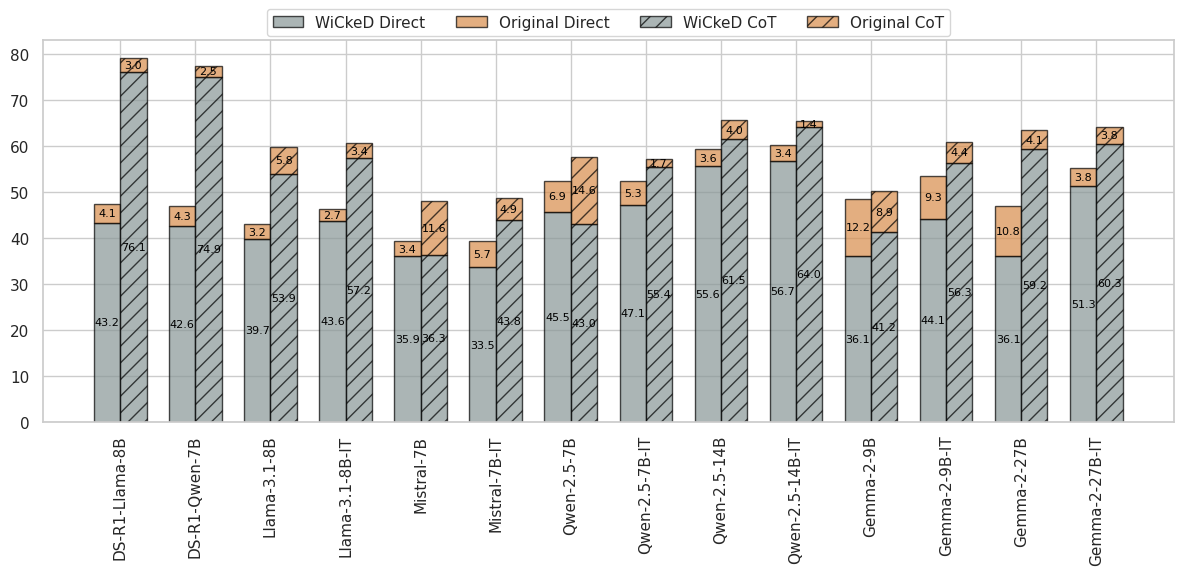

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define x and bar_width
x = list(range(len(df)))
bar_width = 0.35

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Colors
wicked_d_color = "#889696"
a_d_color = "#d88c4a"

# Bar plot
# First stacked bars: WiCkeD_d and A_d (solid)
plt.bar([i - bar_width/2 for i in x], df['WiCkeD_d'], width=bar_width, label='WiCkeD Direct', color=wicked_d_color, edgecolor='black', alpha=0.7)
plt.bar([i - bar_width/2 for i in x], df['A_d'].abs(), width=bar_width, bottom=df['WiCkeD_d'], label='Original Direct', color=a_d_color, edgecolor='black', alpha=0.7)

# Second stacked bars: WiCkeD and A (hatched)
plt.bar([i + bar_width/2 for i in x], df['WiCkeD'], width=bar_width, label='WiCkeD CoT', color=wicked_d_color, edgecolor='black', alpha=0.7, hatch='//')
plt.bar([i + bar_width/2 for i in x], df['A'].abs(), width=bar_width, bottom=df['WiCkeD'], label='Original CoT', color=a_d_color, edgecolor='black', alpha=0.7, hatch='//')

# Annotate bars with values
for i in x:
    # Direct bars
    plt.text(i - bar_width/2, df['WiCkeD_d'][i] / 2, f"{df['WiCkeD_d'][i]:.1f}", ha='center', va='center', fontsize=8, color='black')
    plt.text(i - bar_width/2, df['WiCkeD_d'][i] + df['A_d'].abs()[i] / 2, f"{df['A_d'][i]:.1f}", ha='center', va='center', fontsize=8, color='black')
    # CoT bars
    plt.text(i + bar_width/2, df['WiCkeD'][i] / 2, f"{df['WiCkeD'][i]:.1f}", ha='center', va='center', fontsize=8, color='black')
    plt.text(i + bar_width/2, df['WiCkeD'][i] + df['A'].abs()[i] / 2, f"{df['A'][i]:.1f}", ha='center', va='center', fontsize=8, color='black')
plt.xticks(x, df['Model'], rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4)
plt.tight_layout()
plt.show()


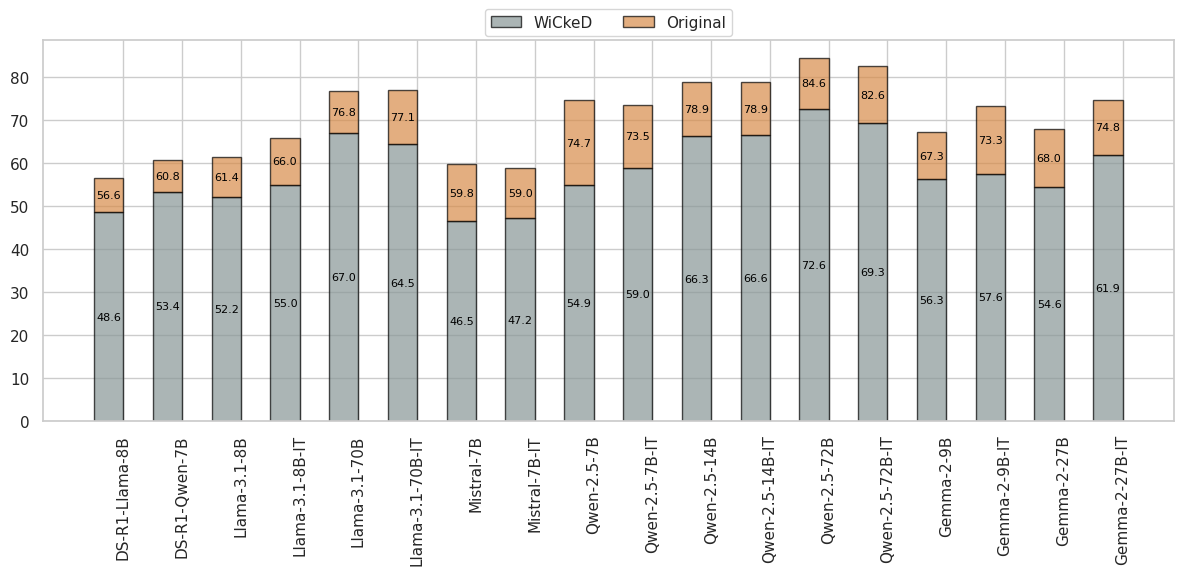

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define x and bar_width
x = list(range(len(df)))
bar_width = 0.5

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Colors
wicked_d_color = "#889696"
a_d_color = "#d88c4a"

# Bar plot
# First stacked bars: WiCkeD_d and A_d (solid)
plt.bar([i - bar_width/2 for i in x], df['WiCkeD'], width=bar_width, label='WiCkeD', color=wicked_d_color, edgecolor='black', alpha=0.7)
plt.bar([i - bar_width/2 for i in x], df['Original'] - df['WiCkeD'], width=bar_width, bottom=df['WiCkeD'], label='Original', color=a_d_color, edgecolor='black', alpha=0.7)

# Second stacked bars: WiCkeD and A (hatched)
# plt.bar([i + bar_width/2 for i in x], df['WiCkeD'], width=bar_width, label='WiCkeD CoT', color=wicked_d_color, edgecolor='black', alpha=0.7, hatch='//')
# plt.bar([i + bar_width/2 for i in x], df['A'].abs(), width=bar_width, bottom=df['WiCkeD'], label='Original CoT', color=a_d_color, edgecolor='black', alpha=0.7, hatch='//')

# Annotate bars with values
for i in x:
    # Direct bars
    plt.text(i - bar_width/2, df['WiCkeD'][i] / 2, f"{df['WiCkeD'][i]:.1f}", ha='center', va='center', fontsize=8, color='black')
    plt.text(i - bar_width/2, df['WiCkeD'][i] + (df['Original'][i] - df['WiCkeD'][i]) / 2, f"{df['Original'][i]:.1f}", ha='center', va='center', fontsize=8, color='black')
    # CoT bars
    # plt.text(i + bar_width/2, df['WiCkeD'][i] / 2, f"{df['WiCkeD'][i]:.1f}", ha='center', va='center', fontsize=8, color='black')
    # plt.text(i + bar_width/2, df['WiCkeD'][i] + df['A'].abs()[i] / 2, f"{df['A'][i]:.1f}", ha='center', va='center', fontsize=8, color='black')
plt.xticks(x, df['Model'], rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4)
plt.tight_layout()
plt.show()